<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### For the "Median value of owner-occupied homes" provide a boxplot

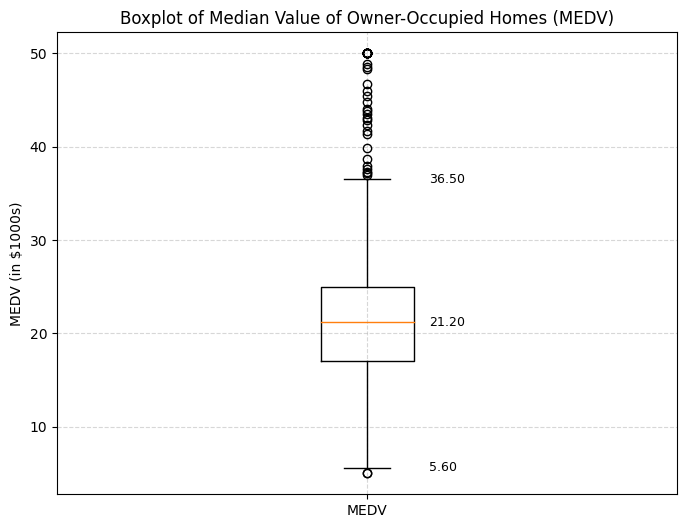

In [6]:
pyplot.figure(figsize=(8, 6))
medv_data = boston_df['MEDV']

box = pyplot.boxplot(medv_data)

median_value = medv_data.median()
lower_whisker = box['whiskers'][0].get_ydata()[1]
upper_whisker = box['whiskers'][1].get_ydata()[1]

pyplot.text(1.1, median_value, f'{median_value:.2f}', verticalalignment='center', fontsize=9)
pyplot.text(1.1, lower_whisker, f'{lower_whisker:.2f}', verticalalignment='center', fontsize=9)
pyplot.text(1.1, upper_whisker, f'{upper_whisker:.2f}', verticalalignment='center', fontsize=9)

pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.ylabel('MEDV (in $1000s)')


pyplot.xticks([1], ['MEDV'])
pyplot.grid(True,linestyle='--',alpha=0.5)
pyplot.show()

#### Graph interpretation

 - <b> Interquartile Range (IQR) (the box) </b> The box represents the middle 50% of the data, between the first quartile (Q1) (25th percentile) and the third quartile (Q3) (75th percentile). The length of the box indicates the spread of the central half of the data. The IQR covers about 25% of the total data range displayed in the plot, indicating that most of the values are concentrated within this central portion of the dataset. This suggests a relatively <b>low variability</b> in the data within the middle range compared to the overall spread
 - <b> Median </b> (the orange line inside the box). The line inside the box represents the median home value. Since it's centered within the box, this indicates that the data is symmetrically distributed around the median. The median home value is approximately <b>212,000 USD</b>
 - <b>Whiskers</b> (the lines extending from the box): The whiskers extend from the box to the smallest and largest values that are not considered outliers. They give a sense of the range of the data.
Whiskers are typically drawn to the minimum and maximum values within 1.5 times the IQR (1.5 * IQR) from the Q1 and Q3. Data points beyond this range are considered outliers.
- <b>Outlier</b> below the lower whisker, set at <b>265,000 USD</b>, represents a data point that falls beneath this threshold in the boxplot. This data point is classified as an outlier because it is lower than the majority of the data, indicating a home price that is significantly less than most other homes in the dataset.
- <b>Outliers</b> above the upper whisker, which is set at <b>365,000 USD</b>, represent home prices that are significantly higher than the majority of homes in the dataset. These data points are classified as outliers because they exceed this <b>365,000 USD</b> threshold, indicating that these homes are considerably more expensive compared to most others in the dataset.


___

### Provide a  bar plot for the Charles river variable

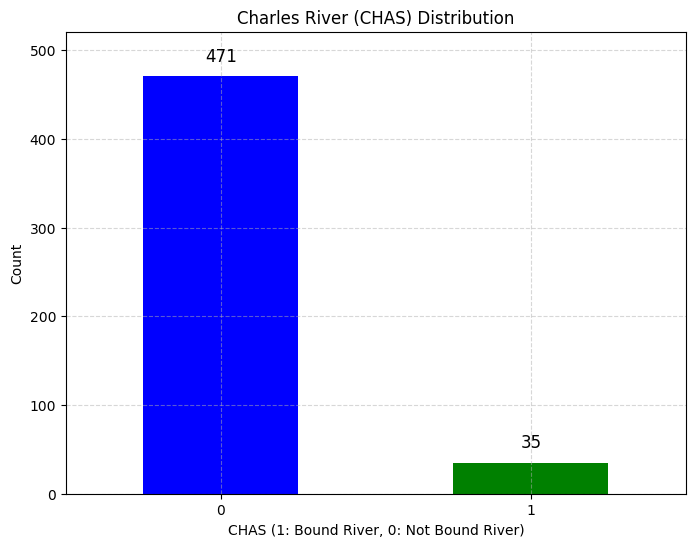

In [7]:
chas_counts = boston_df['CHAS'].astype(int).value_counts()
# Create a bar plot for the CHAS variable
pyplot.figure(figsize=(8,6))
pyplot.ylim(0, chas_counts.max() + 50)

bars = chas_counts.plot(kind='bar', color=['blue', 'green'])
bars.annotate(f'{chas_counts[0]}', xy=(0, chas_counts[0]), ha='center', va='bottom', size=12, xytext=(0, 8), textcoords='offset points')
bars.annotate(f'{chas_counts[1]}', xy=(1, chas_counts[1]), ha='center', va='bottom', size=12, xytext=(0, 8), textcoords='offset points')


pyplot.title('Charles River (CHAS) Distribution')
pyplot.xlabel('CHAS (1: Bound River, 0: Not Bound River)')
pyplot.ylabel('Count')
pyplot.xticks(rotation=0)
pyplot.grid(True,linestyle='--',alpha=0.5)
# Show the plot
pyplot.show()

#### Graph interpretation

The graph clearly illustrates that the majority of homes, specifically 471, are located in areas that border the Charles River. In contrast, only 35 homes are situated away from the river. This significant difference highlights that most of the properties in the dataset are adjacent to the river, suggesting that riverfront homes are far more common than those located further inland.

***

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 800x600 with 0 Axes>

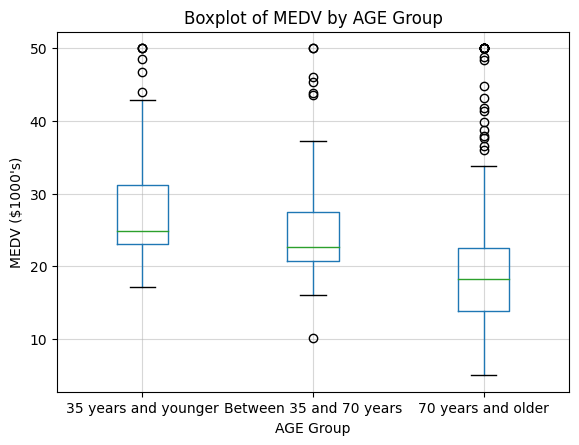

In [8]:
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create a boxplot for MEDV vs the discretized AGE groups
pyplot.figure(figsize=(8,6))
boston_df.boxplot(column='MEDV', by='AGE_group')
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.suptitle('')  # Remove the automatic subtitle
pyplot.xlabel('AGE Group')
pyplot.ylabel('MEDV ($1000\'s)')
pyplot.grid(True, alpha=0.5)

# Show the plot
pyplot.show()

### Graph interpretation
- The boxplot shows that the majority of high-value outliers (above the upper whisker) are found in homes that are 70 years or older, indicating that some older properties are significantly more expensive than typical homes in this group. Conversely, there is a single low-value outlier (below the lower whisker) in the 35 to 70-year age group, suggesting one property in this range is priced unusually lower compared to others. This pattern may indicate a greater variance in home values among older properties, with some commanding premium prices.

- The median value for homes in the "35 years and younger" age group is located near the bottom of the box in the boxplot. This suggests that the majority of home prices in this group are closer to the lower end of the range, with fewer high-priced homes pulling the upper quartile higher. This skewed distribution indicates that while the lower half of the homes in this group have relatively lower prices, there may be a small number of higher-priced homes driving the overall spread upwards.






***

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

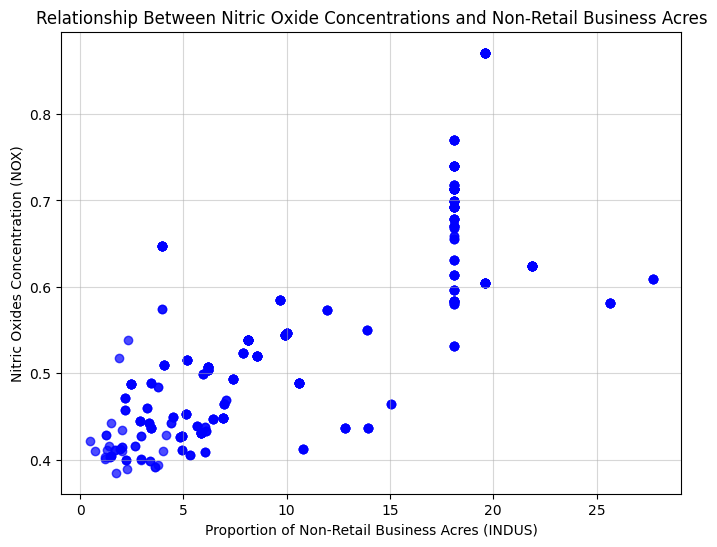

In [9]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.7)
pyplot.title('Relationship Between Nitric Oxide Concentrations and Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.grid(True, alpha=0.5)

# Show the plot
pyplot.show()

### Graph interpretation
The graph indicates that lower concentrations of Nitric Oxides (NOX) are associated with a smaller proportion of non-retail business acres (INDUS), suggesting that less industrialized areas tend to have lower pollution levels. However, as the proportion of industrial land increases, NOX concentrations also rise, indicating that more industrialized areas are linked to higher pollution levels. This suggests a positive relationship between industrial activity and air pollution.

***

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Hypothesis 0: There no a significant difference in median value of houses bounded by the Charles river
- Hypothesis 1: There is a significant difference in median value of houses bounded by the Charles river 

In [10]:
X = boston_df['CHAS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           7.39e-05
Time:                        00:39:45   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions:
- Prob (F-statistic) = 7.39e-05 is much smaller than 0.05, which means the null hypothesis can be rejected. Which means there is a significant difference in median value of houses bounded by the Charles river
- coef of CHAS = 6.3462, means that homes that are near the Charles River (CHAS = 1) are, on average, priced 6,346.20 USD higher than homes that are not near the river (CHAS = 0)
- The p-value (P>|t|) = 0.000 for the CHAS coefficient means that the effect of being near the Charles River on home prices is highly statistically significant. This indicates that the difference in median home values between properties near the river and those not near the river is unlikely to be due to chance. Thus, proximity to the Charles River has a real and significant impact on home prices in the dataset. 


---

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Hypothesis 0: There no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
- Hypothesis 1: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)¶

In [11]:
X = pd.get_dummies(boston_df[['AGE_group']], drop_first=True)
X = X.astype(int)
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     36.41
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.71e-15
Time:                        00:39:45   Log-Likelihood:                -1806.0
No. Observations:                 506   AIC:                             3618.
Df Residuals:                     503   BIC:                             3631.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                27.7758      0.903     30.763      0.000      26.002      29.550
AGE_group_Between 35 and 70 years    -2.8282      1.181     -2.395      0.017      -5.148      -0.508
AGE_group_70 years and older         -7.9824      1.036     -7.704      0.000     -10.018      -5.947
==============================================================================
Omnibus:                      158.454   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.356
Skew:                           1.592   Prob(JB):                     3.84e-86
Kurtosis:                       5.919   Cond. No.                         5.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


_________________

#### Conclusions:
- Prob (F-statistic) = 1.71e-15: The very small p-value (less than 0.05) indicates that the overall model is statistically significant. This means that at least one of the AGE_group categories significantly affects the median house prices
- AGE_group_70 years and older (-7.9824): Homes in this age group also have lower median values compared to the reference group, with a much larger negative effect. The p-value (0.000) is highly significant, meaning that the difference is statistically significant.
- coefficient (coef) for the AGE_group_70 years and older (-7.9824): Homes in this age group have lower median values compared to the reference group, with larg negative effect. The p-value (P>|t|) is 0.000, it meeans is highly significant, meaning that the difference is statistically significant.
- I can reject the null hypothesis, indicating that there is a significant difference in the median values of houses (MEDV) for the AGE_group "70 years and older


***

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- Hypothesis 0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- Hypothesis 1: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [12]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           7.91e-98
Time:                        00:39:45   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions:
- Prob (F-statistic) = 7.91e-98: The very small p-value (less than 0.05) indicates that the overall model is statistically significant. This null hypothesis can not be rejected, and there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

- NOX coefficient: 45.2108: This means that for each unit increase in Nitric oxide concentration, the proportion of non-retail business acres (INDUS) is expected to increase by approximately 45.21. The p-value (P>|t|) for NOX is 0.000, which indicates that this effect is statistically significant.

___

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

- Hypothesis 0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
- Hypothesis 1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [15]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        00:52:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions
- Prob (F-statistic): 1.21e-08: The model overall is statistically significant because the p-value is very small (much lower than the usual threshold of 0.05), meaning that DIS is a significant predictor of MEDV. Null hypothesis can be rejected
- DIS coefficient: 1.0916: This suggests that for every additional unit increase in the weighted distance to the Boston employment centers (DIS), the median value of homes (MEDV) increases by approximately 1,091.60 USD
